# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Reading CSV into a DataFrame using pandas
df = pd.read_csv('Wholesale_Data.csv')

In [3]:
# Displaying the first few rows of the DataFrame
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Displaying the last few rows of the dataframe
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [5]:
# Displaying a random sample of the dataframe
df.sample(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
334,2,2,16823,928,2743,11559,332,3486
204,1,1,1956,891,5226,1383,5,1328
81,2,3,219,9540,14403,283,7818,156
227,1,1,4042,2204,1563,2286,263,689
100,2,3,11594,7779,12144,3252,8035,3029


In [6]:
# Checking for null values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
# Checking for zero values
(df == 0).sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
# Displaying summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
# Displaying summary statistics
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
def multi_hist_plot(df, column, axis):
    """
    Display a histogram plot for a specified column within the DataFrame on a specified axis.

    Parameters:
    - df: DataFrame containing the dataset.
    - column: Name of the column in the DataFrame 'df' to be plotted.
    - axis: Axis on which to plot the histogram.

    Returns:
    - None
    """
    sns.histplot(df, x=column, ax=axes[axis])
    
def multi_box_plot(df, column, axis):
    """
    Display a boxplot for a specified column within the DataFrame 'df' on a specified axis.

    Parameters:
    - df: DataFrame containing the dataset.
    - column: Name of the column in the DataFrame 'df' to be plotted.
    - axis: Axis on which to plot the boxplot.
    """
    sns.boxplot(df, x=column, ax=axes[axis])
    
def multi_scatter(df, feature_1, feature_2, axis):
    """
    Display a scatterplot for a specified column within the DataFrame 'df' on a specified axis.

    Parameters:
    - df: DataFrame containing the dataset.
    - column: Name of the column in the DataFrame 'df' to be plotted.
    - axis: Axis on which to plot the boxplot.
    """
    sns.scatterplot(x=df[feature_1],y=df[feature_2], ax=axes[axis])

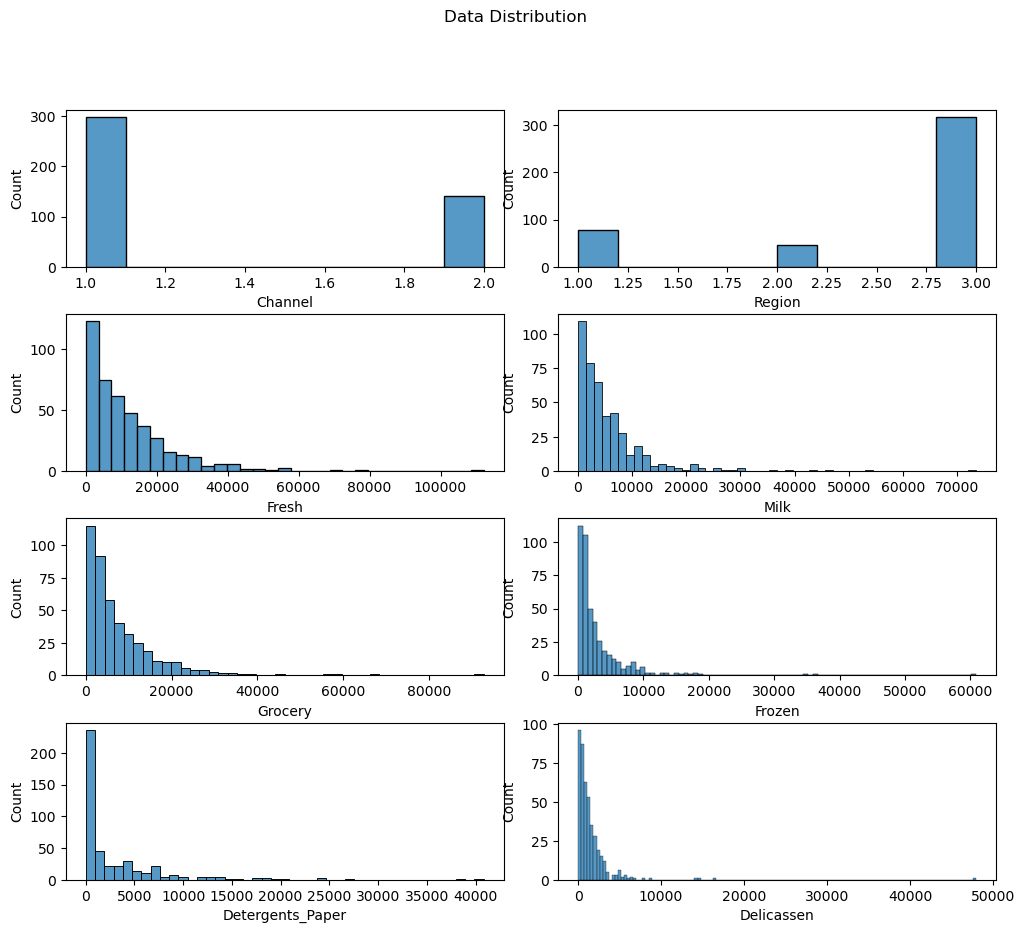

In [11]:
# Create subplots with a 4x2 grid layout and set the overall figure size
fig, axes = plt.subplots(4, 2, figsize=(12, 10))

# Adjust spacing between subplots and set the title for the entire figure
fig.subplots_adjust(hspace=0.30, wspace=0.125)
fig.suptitle('Data Distribution')

# List of axis positions for each subplot
axis_list = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1)]

# Iterate through the columns of the DataFrame to create multiple histogram plots on different subplots
for x in range(len(df.columns)):
    multi_hist_plot(df, df.columns[x], axis_list[x])

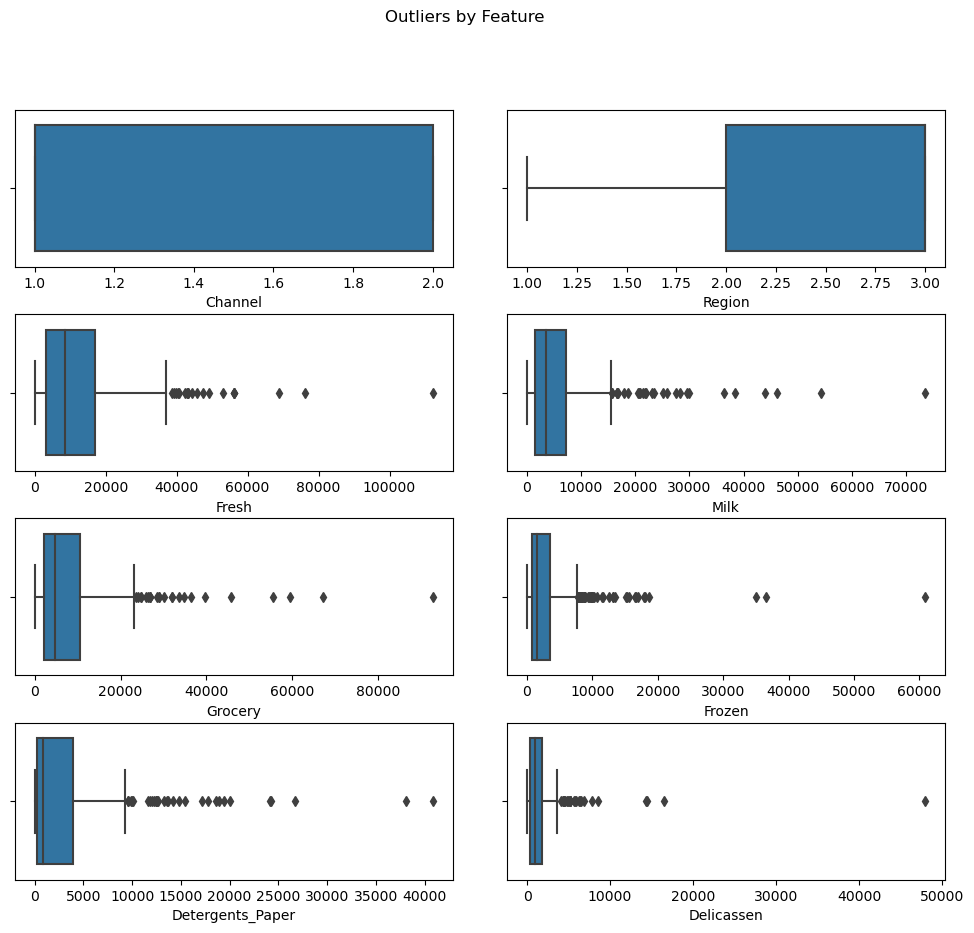

In [12]:
# Create subplots with a 4x2 grid layout and set the overall figure size
fig, axes = plt.subplots(4, 2, figsize=(12, 10))

# Adjust spacing between subplots and set the title for the entire figure
fig.subplots_adjust(hspace=0.30, wspace=0.125)
fig.suptitle('Outliers by Feature')

# List of axis positions for each subplot
axis_list = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1)]

# Iterate through the columns of the DataFrame to create multiple histogram plots on different subplots
for x in range(len(df.columns)):
    multi_box_plot(df, df.columns[x], axis_list[x])

<Axes: >

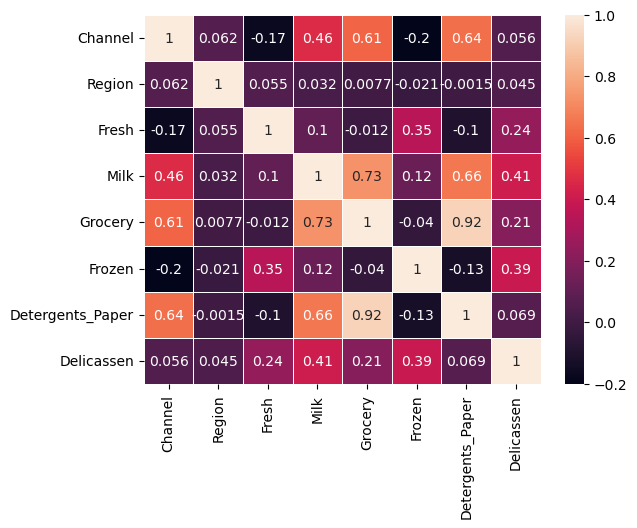

In [13]:
# Create a correlation heatmap
sns.heatmap(df.corr(), annot=True, linewidth=.5)

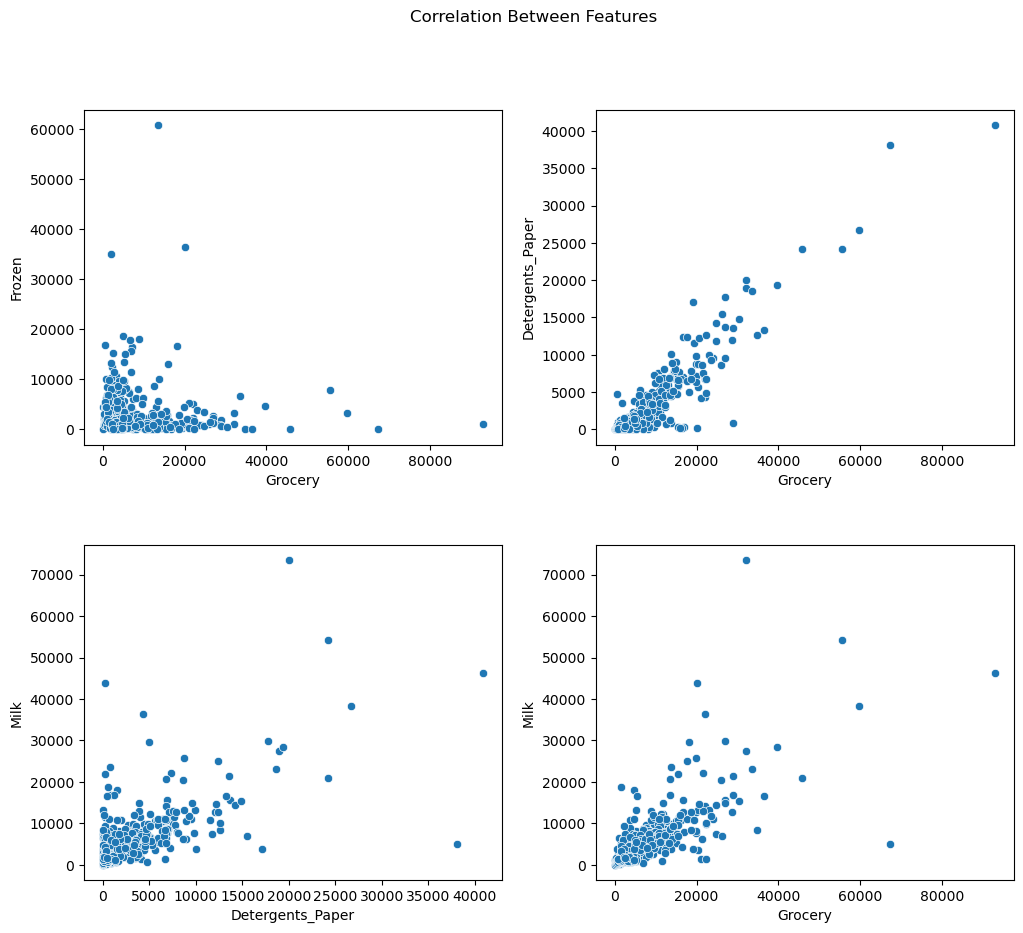

In [14]:
# Create subplots with a 4x2 grid layout and set the overall figure size
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Adjust spacing between subplots and set the title for the entire figure
fig.subplots_adjust(hspace=0.30, wspace=0.225)
fig.suptitle('Correlation Between Features')

# List of axis positions for each subplot
axis_list = [(0,0),(0,1),(1,0),(1,1)]
feature_1 =['Grocery','Grocery','Detergents_Paper','Grocery']
feature_2 =['Frozen','Detergents_Paper','Milk','Milk']
# Iterate through the columns of the DataFrame to create multiple histogram plots on different subplots
for x in range(4):
    multi_scatter(df, feature_1[x], feature_2[x],axis_list[x])

Upon examining the correlations among features, a significant association is observed, especially between Grocery and both Milk and Detergents_Paper. As a result, the decision has been made to remove the Grocery feature to alleviate the heightened correlation between features.

In [15]:
# Drop columns from dataframe
df.drop(columns='Grocery', inplace=True)

In [16]:
def iqr_high(df, feature):
    """
    Calculate the upper bound outlier threshold using the IQR (Interquartile Range) method for a specific feature.

    Parameters:
    - df: DataFrame containing the data.
    - feature: Name of the feature (column) in the DataFrame.

    Returns:
    - high: Upper bound threshold for outlier detection based on the IQR method.
    """
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    high = q3 + 1.5 * iqr
    return high



def iqr_low(df, feature):
    """
    Calculate the lower bound outlier threshold using the IQR (Interquartile Range) method.

    Parameters:
    - df: DataFrame containing the data.
    - feature: Name of the feature (column) in the training set (X_train).

    Returns:
    - low: Lower bound threshold for outlier detection based on the IQR method.
    """
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    return low

def replace_outliers_median(df, feature_list):
    """
    Replace outliers in the given DataFrame 'df' with the median value for each feature.

    This function iterates through the features in the provided DataFrame, calculates the median value
    for each feature, and replaces values higher than the upper outlier threshold and lower than
    the lower outlier threshold with the corresponding feature's median.

    Note:
    - The outlier thresholds are determined using the interquartile range (IQR) method.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    None (Modifies the provided DataFrame 'df' in place by replacing outliers with median values)
    """
    #feature_list = df.drop(columns=['Channel_1', 'Channel_2', 'Region_1', 'Region_2', 'Region_3']).columns
    for feature in feature_list:
        df_median = df[feature].median()
        high_threshold = iqr_high(df, feature)
        low_threshold = iqr_low(df, feature)
        df.loc[df[feature] > high_threshold, feature] = df_median
        df.loc[df[feature] < low_threshold, feature] = df_median


def log_transform(data):
    """
    Apply a natural logarithm transformation to the given data.

    Parameters:
    - data (array-like): The input data to be transformed.

    Returns:
    - array-like: The transformed data after applying the natural logarithm.
    """
    return np.log(data)


In [17]:
# List of categorical columns for one-hot encoding
categorical_columns = ['Channel', 'Region']

# List of numerical columns for log transformation
numerical_columns = ['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Function transformer for log transformation
log_transformer = FunctionTransformer(func=log_transform, validate=False)

# Column transformer for preprocessing
pre_processor = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(), categorical_columns),  # One-hot encode categorical columns
        ('log_transformer', log_transformer, numerical_columns),  # Apply log transformation to numerical columns
    ],
    remainder='passthrough'  # Passthrough any columns not specified for transformation
)

In [18]:
# Creating a pipeline for data preprocessing
pipeline = Pipeline(
    steps=[
        ('pre_processor', pre_processor),  # Applying the column transformer for preprocessing
        ('scaler', StandardScaler())  # Standardizing the data using StandardScaler
          ])

In [19]:
# Creation of a variable to store trandformed dataframe
scaled_df = pipeline.fit_transform(df)

In [20]:
# Extracting the names of the one-hot encoded features
categorical_features = pre_processor.named_transformers_['one_hot'].get_feature_names_out()

In [21]:
# Combining categorical and numerical column names
column_names = categorical_features.tolist() + numerical_columns

In [22]:
# Creating a new dataframe with the scaled data, and the original column names
scaled_df = pd.DataFrame(data=scaled_df, columns=column_names)

In [23]:
# Replaced outliers with the median values
feature_list_scaled = scaled_df.drop(columns=['Channel_1', 'Channel_2', 'Region_1', 'Region_2', 'Region_3']).columns
feature_list_origin = df.columns
replace_outliers_median(df, feature_list_origin)
replace_outliers_median(scaled_df, feature_list_scaled)

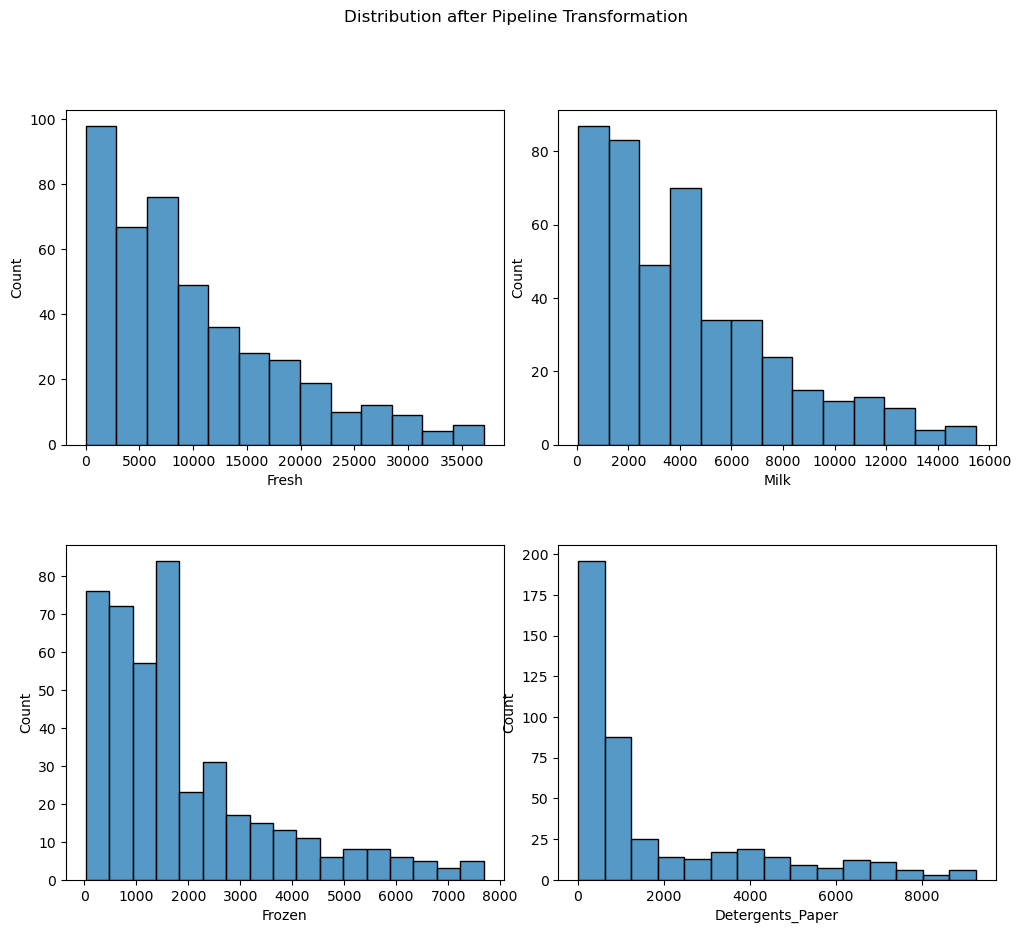

In [24]:
feature_list = scaled_df.drop(columns=['Channel_1', 'Channel_2', 'Region_1', 'Region_2', 'Region_3']).columns
# Create subplots with a 4x2 grid layout and set the overall figure size
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Adjust spacing between subplots and set the title for the entire figure
fig.subplots_adjust(hspace=0.30, wspace=0.125)
fig.suptitle('Distribution after Pipeline Transformation')

# List of axis positions for each subplot
axis_list = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]

# Iterate through the columns of the DataFrame to create multiple histogram plots on different subplots
for x in range(len(scaled_df.columns[:-6])):
    multi_hist_plot(df, feature_list[x], axis_list[x])

In [25]:
# Importing VarianceThreshold
from sklearn.feature_selection import VarianceThreshold

# Instantiate VarianceThreshold to remove low-variance features (threshold set to 0.1)
vt = VarianceThreshold(0.3)

# Fit and transform the feature matrix X using VarianceThreshold
df_test = vt.fit_transform(scaled_df)

# Get the selected columns after applying the VarianceThreshold
selected_columns = scaled_df.columns[vt.get_support()]

# Update the feature matrix X with only the selected columns
scaled_df = pd.DataFrame(df_test, columns=selected_columns)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [26]:
# Import necesarry libraries
from sklearn.cluster import KMeans

In [27]:
def plot_distortion(X, max_clusters=10):
    """
    Plot the distortion (inertia) for different numbers of clusters in KMeans clustering.

    Parameters:
    - X: Input data (array-like or pd.DataFrame).
    - max_clusters: Maximum number of clusters to consider (default is 10).

    Returns:
    - None (displays a plot).

    The function fits KMeans clustering with varying numbers of clusters (from 1 to max_clusters)
    and plots the distortion (inertia) for each number of clusters. Distortion is the sum of squared
    distances of samples to their closest cluster center.

    The plot helps in identifying the optimal number of clusters based on the 'elbow' in the graph,
    where further partitioning does not significantly reduce distortion.

    Example:
    >>> plot_distortion(data, max_clusters=15)
    """
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    # Plotting the distortion for different numbers of clusters
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal k')
    plt.show()

In [28]:
# Convert the DataFrame to a NumPy array for KMeans clustering
kmeans_data = scaled_df.to_numpy()

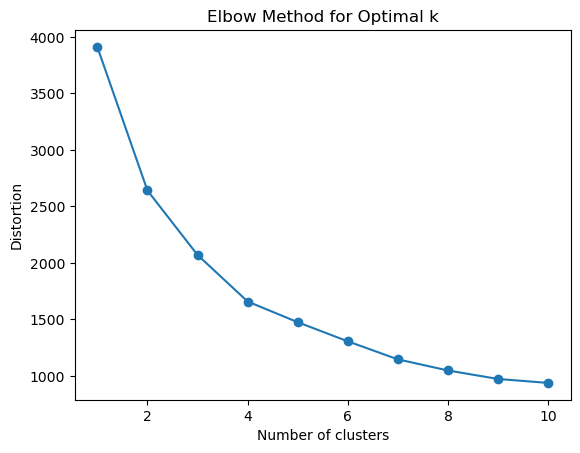

In [29]:
# Create inertia plot
plot_distortion(kmeans_data)

In [30]:
# Import Kmeans from sklearn
from sklearn.cluster import KMeans

# Creating a KMeans instance
kmeans = KMeans(
    n_clusters=3,        # Number of clusters to form
    n_init='auto',       # Number of times the k-means algorithm will be run with different centroid seeds
    random_state=42,     # Random state for reproducibility
    init='k-means++',    # Method for initializing centroids ('k-means++' is a smart initialization method)
    max_iter=600         # Maximum number of iterations for each initialization
)

# Fitting KMeans to the data
kmeans.fit(kmeans_data)

KMeans(max_iter=600, n_clusters=3, n_init='auto', random_state=42)

In [31]:
# Assigning cluster labels to the DataFrame
scaled_df['cluster_labels'] = kmeans.labels_
df['cluster_labels'] = kmeans.labels_

In [32]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

# Creating a PCA instance with 2 components
pca = PCA(n_components=2)

# Transforming the data using PCA
pca_result = pca.fit_transform(kmeans_data)

In [33]:
# Adding two new columns to the DataFrame with PCA components, to aid in visualization
scaled_df['pca_1'] = pca_result[:, 0]
scaled_df['pca_2'] = pca_result[:, 1]

In [37]:
# Calculating cluster means by grouping the DataFrame by 'cluster_labels'
cluster_means = scaled_df.groupby('cluster_labels').mean()

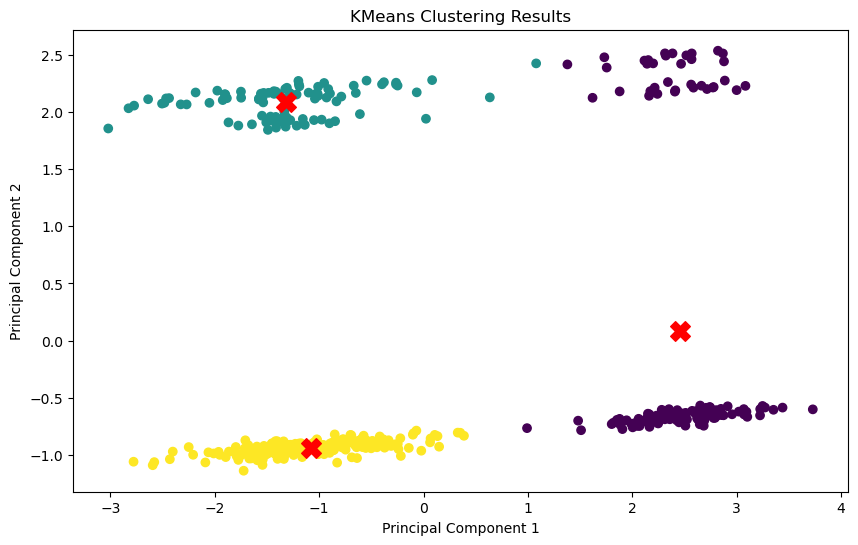

In [38]:
import matplotlib.pyplot as plt

# Creating a scatter plot of PCA components colored by cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df['pca_1'], scaled_df['pca_2'], c=scaled_df['cluster_labels'], cmap='viridis', label='Data Points')

# Adding centroids as red 'X' markers
plt.scatter(cluster_means['pca_1'], cluster_means['pca_2'], marker='X', s=200, c='red', label='Centroids')

# Adding plot details
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.legend() 
plt.show()


In [40]:
from sklearn.metrics import silhouette_score

# Calculating the silhouette score for the clustering result
silhouette_avg = silhouette_score(scaled_df[['pca_1', 'pca_2']], kmeans.labels_)

# Printing the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.714997522880368


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [45]:
# Importing aglomerative clustering from sklearn
from sklearn.cluster import AgglomerativeClustering

# Importing cluster hierarchy
import scipy.cluster.hierarchy as sch

In [46]:
def plot_dendrogram(X, method='ward'):
    """
    Plot a dendrogram for hierarchical clustering.

    Parameters:
    - X: Data array for hierarchical clustering.
    - method: Linkage method used in hierarchical clustering.

    Returns:
    - None (displays the dendrogram plot).
    """
    # Compute and plot the dendrogram
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))

    # Adding title and labels to the plot
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')

    # Display the plot
    plt.show()

In [47]:
# Creating a cluster data variable to aid in visualization
cluster_data = scaled_df[['pca_1','pca_2']].values

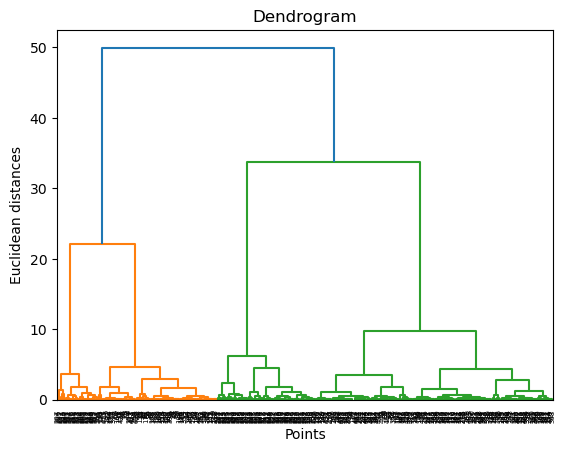

In [48]:
plot_dendrogram(cluster_data)

Decided to cut a line through the dendrogram about halfway leaving 3 clusters.

In [49]:
from sklearn.cluster import AgglomerativeClustering

# Creating an instance of AgglomerativeClustering
ac = AgglomerativeClustering(
    metric='euclidean',   # The distance metric used for linkage
    linkage='complete',   # The linkage criterion for calculating distances between clusters
    n_clusters=3          # The number of clusters to form
)

In [50]:
# Fitting the AgglomerativeClustering model to the data
ac_object = ac.fit(cluster_data)

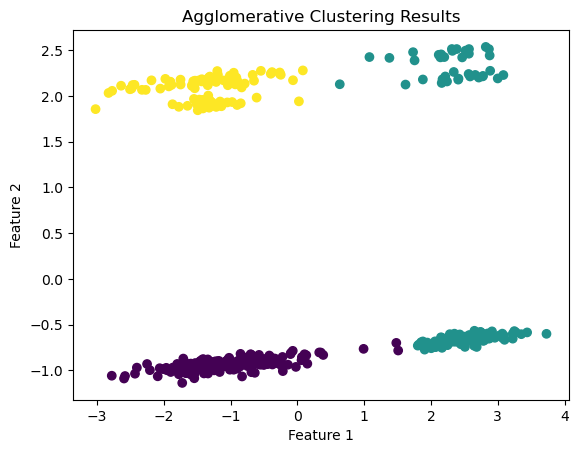

In [51]:
# Creating a scatter plot of the data colored by cluster labels
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=ac_object.labels_, cmap='viridis')

# Adding plot details
plt.title('Agglomerative Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Displaying the plot
plt.show()

In [52]:
# Calculating the silhouette score for the clustering result
silhouette_avg = silhouette_score(scaled_df[['pca_1', 'pca_2']], ac_object.labels_)

# Printing the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7061969388550242


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [53]:
# Creating a NumPy array 'X' by dropping specified columns from 'df'
X = scaled_df.drop(columns=['cluster_labels', 'pca_1', 'pca_2']).values

In [54]:
# Creating a PCA instance with 'n_components=None' (keeping all components)
pca = PCA(n_components=None)

# Fitting the PCA model to the data 'X'
df_pca = pca.fit(X)

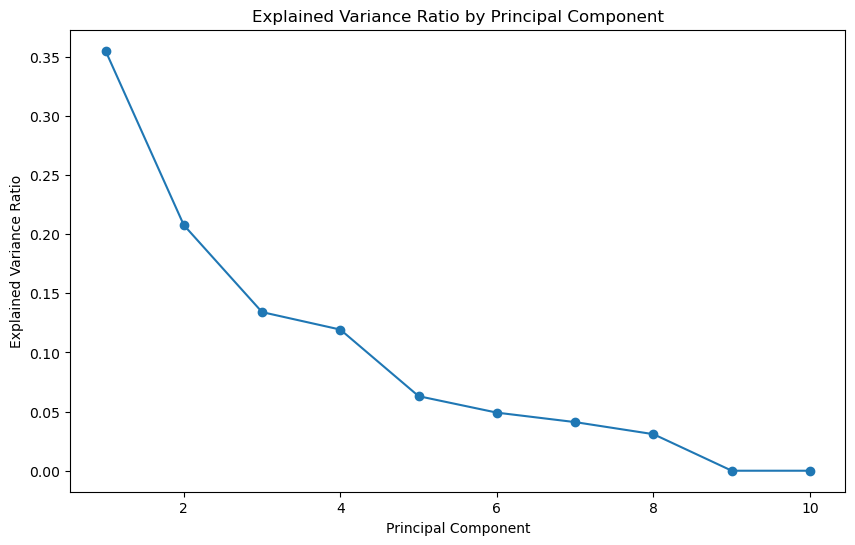

In [55]:
# Creating a plot to visualize the explained variance ratio by principal component
plt.figure(figsize=(10, 6))

# Plotting the explained variance ratio for each principal component
plt.plot(
    range(1, len(df_pca.explained_variance_ratio_) + 1),
    df_pca.explained_variance_ratio_,
    marker='o',
    linestyle=None
)

# Adding plot details
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Displaying the plot
plt.show()

In [56]:
# Accessing the explained variance ratio for each principal component
explained_variance_ratio = df_pca.explained_variance_ratio_

In [57]:
# Transforming the original data 'X' using the fitted PCA model
df_pca = pca.transform(X)

In [58]:
# Creating a dataframe from transformed data
df_pca = pd.DataFrame(data=df_pca)

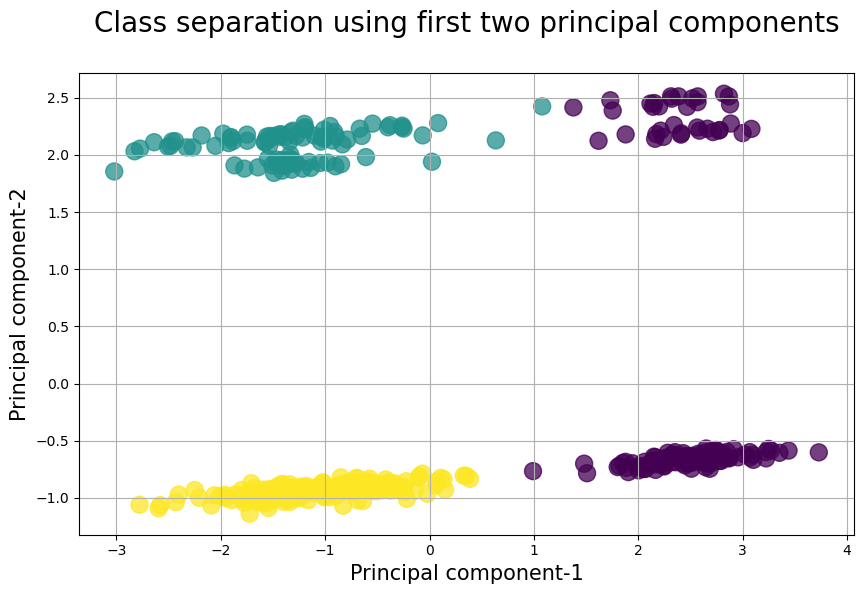

In [59]:
# Creating a scatter plot to visualize data in the first two principal components
plt.figure(figsize=(10, 6))

# Scatter plot with points colored by 'cluster_labels'
plt.scatter(df_pca[0], df_pca[1], c=df['cluster_labels'], alpha=0.75, s=150)

# Adding grid and plot details
plt.grid(True)
plt.title("Class separation using first two principal components\n", fontsize=20)
plt.xlabel("Principal component-1", fontsize=15)
plt.ylabel("Principal component-2", fontsize=15)

# Displaying the plot
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- The original data, characterized by a heavily right-skewed distribution, required transformation to achieve a more normal distribution.
- Across various clustering algorithms, the configuration of 3 clusters demonstrated the optimal balance between cohesion and separation.
- An exploration of the explained variance plot indicated that approximately 55% of the information can be elucidated by the first two principal components.
- Among the identified clusters, Cluster 2 emerged as the largest, followed by Cluster 0, while Cluster 1 was the smallest and exhibited the lowest spending. Further analysis revealed that Cluster 2, despite being the largest, spent significantly less on milk and Detergents_Paper products compared to Cluster 0, suggesting potential marketing opportunities for these specific products to Cluster 2 customers.

In [70]:
df.groupby('cluster_labels').count().sort_values(by='Region', ascending=False)

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
cluster_labels,,,,,,,
2,211,211,211,211,211,211,211
0,140,140,140,140,140,140,140
1,89,89,89,89,89,89,89


In [73]:
df.groupby('cluster_labels').sum().sort_values(by='Milk', ascending=False)

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
cluster_labels,,,,,,,
0,280,368,1145447,1011989,197843,557943.0,176439.0
2,211,633,2293316,623102,425371,165990.0,204740.5
1,91,118,975792,248914,211315,70717.0,95911.0
